# Predicting Housing Prices

### Introduction
Housing prices in certain parts of the US are on the rise. As a result, it is important for home buyers to be informed on the housing market by cross referencing prices with the various characteristics of a home. The question we will answer with our project is how the living room size and renovation year of a house affects the price. The dataset used to answer this question is called “House Sales in King County, USA” uploaded by user harlfoxem on Kaggle. The dataset includes 21  different variables, including house price, number of bathrooms, number of bedrooms, renovation year,  etcetera,  for a total of 21614 observations with each observation being a different home in King County, USA.

### Preliminary Exploratory data analysis

In [68]:
#please run this cell for correct packages
suppressMessages(library(tidyverse))
library(tidymodels)
suppressMessages(library(dbplyr))
library(gridExtra)
options(repr.plot.width=11, repr.plot.height=5)
options(scipen = 999, digits = 10)

In [69]:
#Run t0 load and tidy the data
url <- "https://raw.githubusercontent.com/Moe-Jala/dsci-100-group-003-7/main/kc_house_data.csv"
housing_data <- read_csv(url, show_col_type = FALSE) |>
    select(price, sqft_living, yr_renovated) |>
    filter(yr_renovated != 0, price < 3000000)

In [78]:
#split and summarize key points of dataframe
set.seed(69)
housing_split <- initial_split(housing_data, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)

data_summary <- tibble(summarize(housing_train, avg_price = mean(price),
                                                 avg_living_size = mean(sqft_living),
                                                 avg_renovation_yr = mean(yr_renovated)))
slice(housing_train, 1:3)
data_summary

price,sqft_living,yr_renovated
<dbl>,<dbl>,<dbl>
247000,1270,2013
378750,2160,2011
310000,2190,1974


avg_price,avg_living_size,avg_renovation_yr
<dbl>,<dbl>,<dbl>
721311.8407,2279.766962,1996.237463


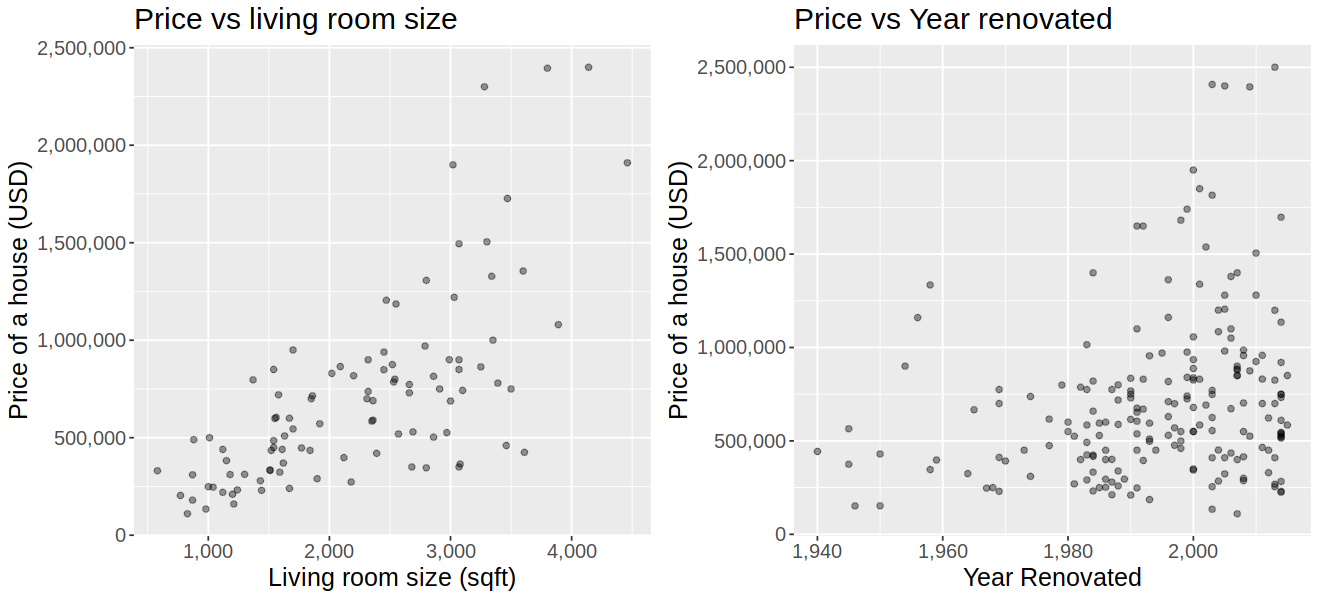

In [79]:
#
set.seed(69)
price_versus_yr_plot <- housing_data |>
    sample_n(200)|>
    ggplot(aes(x = yr_renovated, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "Year Renovated", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = scales::comma)+
        ggtitle("Price vs Year renovated")

price_versus_size_plot <- housing_data |>
    sample_n(100)|>
    ggplot(aes(x = sqft_living, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "Living room size (sqft)", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = scales::comma)+
        ggtitle("Price vs living room size")

grid.arrange(price_versus_size_plot, price_versus_yr_plot, ncol = 2)

### Methods
We will conduct our data analysis by regression.  Regression involves using historical data to forecast future observations, making it a predictive problem scenario. In this specific case, we will use the variables “year renovated”,  and “size of living” to predict the house price for our new observation. To better understand the relationships between the variables, we intend to create a scatter plot. Scatter plots are valuable visual tools as they provide a clear illustration of the associations between different factors, aiding us in comprehending the underlying patterns within the data.


### Expected outcomes and Significance 
We expect to find several key insights and considerations when predicting house prices based on the square footage and renovation year. Firstly, we can expect to discover positive correlations between square footage and the price of a house, as houses with more space are usually more expensive due to the accommodation for more amenities. Additionally we expect to find outliers to our dataset as external variables such as build year, housing demand, location and unusual combinations of our chosen variables can result in varying prices. 

The impact such findings could have is primarily to predict values based on how changes in our selected factors affect housing prices. This information can be used toward predictive modeling and help buyers/sellers make informed decisions based on the housing market. In the real world, predictive findings in this context play a large role in dictating the housing market which in turn impacts real estate marketing, risk assessments, housing improvement and many other correlated aspects. 
 
Future questions leading from these impacts include causation analysis. This includes determining the relative strength of each variable's impact, and determining what external variables have the most influence on house pricing. Similar to causation analysis, examining these variables over geographical variations, and temporally can have different effects on their relationship. Additionally, if our model achieves a low accuracy, we might question what other variables play a role into determining the price of a home and if our model would benefit from incorporating more variables such as location and lot size.


# End credits:
group 007

by: Mariam, Moe, Mohammed, and Sabrina